# Plots for Presentation

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import seaborn as sns

In [2]:
df_big = pd.read_csv("../data/data.csv")

In [3]:
df_training = pd.read_csv("../data/data_multiclass_with_none_large.csv")

### Load Stylesheet

In [4]:
plt.style.use('stylesheet.mplstyle')

### Plots for big Dataset

In [5]:
df_big = df_big[df_big["logical_fallacies"] != "faulty_generalization"]

In [6]:
df_big['logical_fallacies'].value_counts().sort_index(ascending=True)

logical_fallacies
ad_hominem             1062
appeal_to_authority     726
appeal_to_emotion      1619
false_dilemma           941
none                   5418
slippery_slope          627
Name: count, dtype: int64

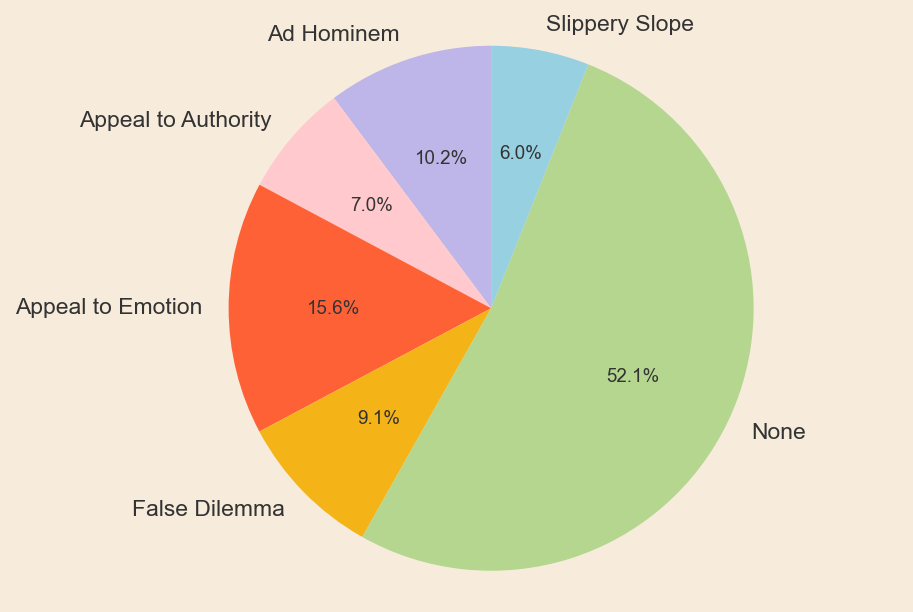

In [7]:
# Create pie chart using stylesheet
fig, ax = plt.subplots()
labels= ["Ad Hominem", "Appeal to Authority", "Appeal to Emotion", "False Dilemma", "None", "Slippery Slope"]

wedges, texts, autotexts = ax.pie(
    df_big['logical_fallacies'].value_counts().sort_index(ascending=True), 
    labels=labels, 
    autopct='%1.1f%%', 
    startangle=90
    )

for text in texts:
    text.set_fontsize(11) 

ax.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

### Plots for small Dataset

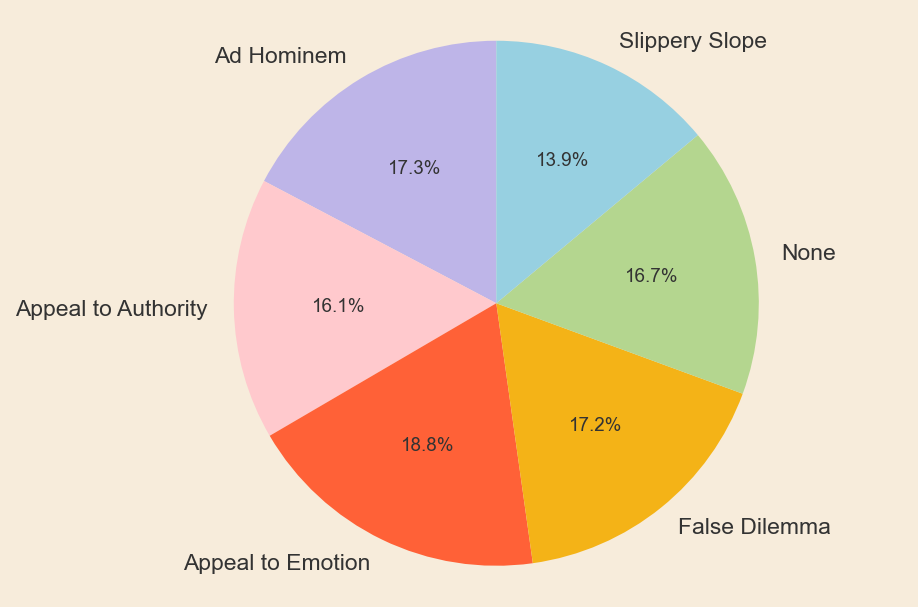

In [8]:
# Create pie chart using stylesheet
fig, ax = plt.subplots()
labels= ["Ad Hominem", "Appeal to Authority", "Appeal to Emotion", "False Dilemma", "None", "Slippery Slope"]

wedges, texts, autotexts = ax.pie(
    df_training['logical_fallacies'].value_counts().sort_index(ascending=True), 
    labels=labels, 
    autopct='%1.1f%%', 
    startangle=90
    )

for text in texts:
    text.set_fontsize(11) 

ax.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

### Macro F1 Score
<span style="color:red">Just a draft, needs to be adapted for the presentation</span>

In [9]:
df_f1 = pd.DataFrame({
    "Model" : ["Baseline:\nLogistic Regression", "Zero-Shot:\nDeepSeek", "Pre-trained:\nDistilbert"],
    "Macro F1 score" : [0.63, 0.53, 0.7]
})
df_f1

,Model,Macro F1 score
0,Baseline:\nLogistic Regression,0.63
1,Zero-Shot:\nDeepSeek,0.53
2,Pre-trained:\nDistilbert,0.70


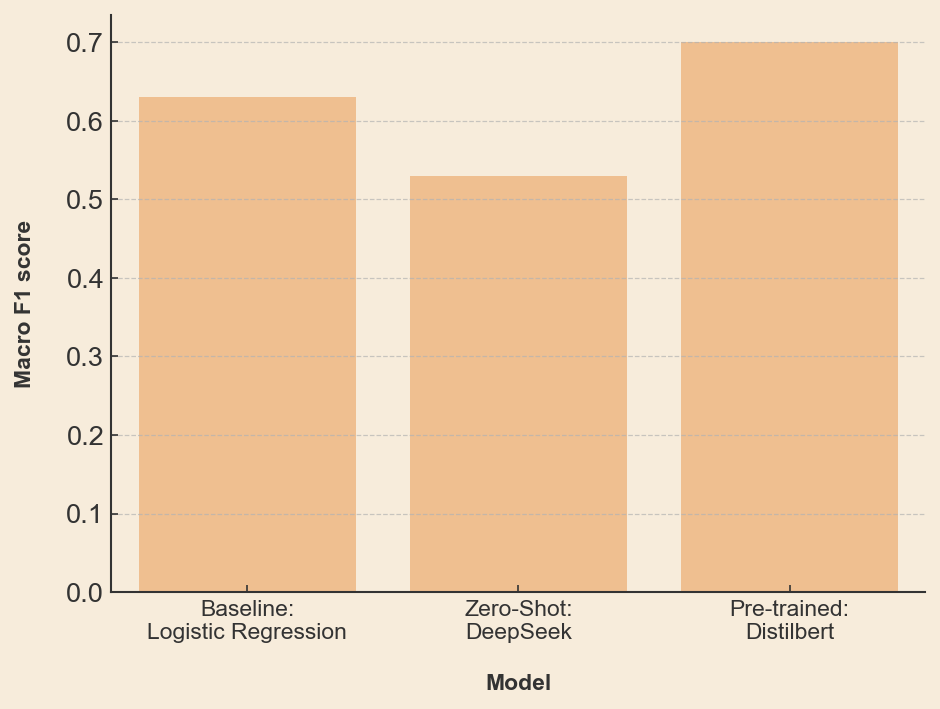

In [10]:
sns.barplot(x="Model", y="Macro F1 score", data=df_f1, color="#ffbf80")
plt.show()